In [8]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import pandas as pd
import re

nltk.download('punkt') # for tokenization
nltk.download('stopwords') # for stopwords
nltk.download('wordnet') # for lemmatization
nltk.download('omw-1.4') # wordNet lemmatizer data
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /Users/subin/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/subin/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/subin/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /Users/subin/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt_tab to /Users/subin/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [4]:
# Initialize tools
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

# loading data
df = pd.read_csv('../datasets/bbc_data.csv')

df

,data,labels
0,Musicians to tackle US red tape Musicians gro...,entertainment
1,"U2s desire to be number one U2, who have won ...",entertainment
2,Rocker Doherty in on-stage fight Rock singer ...,entertainment
3,Snicket tops US box office chart The film ada...,entertainment
4,"Oceans Twelve raids box office Oceans Twelve,...",entertainment
...,...,...
2220,Warning over Windows Word files Writing a Mic...,tech
2221,Fast lifts rise into record books Two high-sp...,tech
2222,Nintendo adds media playing to DS Nintendo is...,tech
2223,Fast moving phone viruses appear Security fir...,tech


In [16]:
# Custom text preprocessing function
def preprocess(text):
    # Lowercase the text
    text = text.lower()
    # Remove punctuation and numbers
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Tokenize the text
    tokens = word_tokenize(text)
    # Remove stopwords and lemmatize the tokens
    cleaned = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return ' '.join(cleaned)
    

In [17]:
# Apply preprocessing
df['clean_text'] = df['data'].apply(preprocess)

In [18]:
df

,data,labels,clean_text
0,Musicians to tackle US red tape Musicians gro...,entertainment,musician tackle u red tape musician group tack...
1,"U2s desire to be number one U2, who have won ...",entertainment,u desire number one u three prestigious grammy...
2,Rocker Doherty in on-stage fight Rock singer ...,entertainment,rocker doherty onstage fight rock singer pete ...
3,Snicket tops US box office chart The film ada...,entertainment,snicket top u box office chart film adaptation...
4,"Oceans Twelve raids box office Oceans Twelve,...",entertainment,ocean twelve raid box office ocean twelve crim...
...,...,...,...
2220,Warning over Windows Word files Writing a Mic...,tech,warning window word file writing microsoft wor...
2221,Fast lifts rise into record books Two high-sp...,tech,fast lift rise record book two highspeed lift ...
2222,Nintendo adds media playing to DS Nintendo is...,tech,nintendo add medium playing d nintendo releasi...
2223,Fast moving phone viruses appear Security fir...,tech,fast moving phone virus appear security firm w...


In [19]:
# Vectorization
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['clean_text'])
y = df['labels']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
clf = MultinomialNB()
clf.fit(X_train, y_train)

MultinomialNB()

In [20]:
# predict and evalueate
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

               precision    recall  f1-score   support

     business       0.96      0.99      0.98       103
entertainment       1.00      0.94      0.97        84
     politics       0.91      0.97      0.94        80
        sport       0.98      0.99      0.98        98
         tech       1.00      0.94      0.97        80

     accuracy                           0.97       445
    macro avg       0.97      0.97      0.97       445
 weighted avg       0.97      0.97      0.97       445



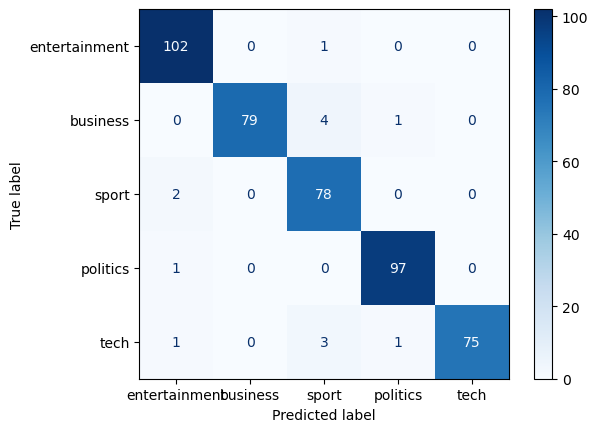

In [21]:
# confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=df['labels'].unique())
disp.plot(cmap=plt.cm.Blues)
plt.show()

## Example Inference

In [23]:
sample_text = 'Current Goverment of Nepal led by Prime Minister KP Oli is one of the most corrupted goverment'

# Preprocess using the same steps
sample_text_cleaned = preprocess(sample_text)

# Vectorize
sample_vector = vectorizer.transform([sample_text_cleaned])

# Predict
predicted_category = clf.predict(sample_vector)
print('Predicted_category:', predicted_category[0])

Predicted_category: politics
